![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [95]:
# Start your code here!

#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu
import seaborn as sns

alpha = 0.10

In [50]:
# Load the datasets
men_results = pd.read_csv('men_results.csv', usecols=range(1,7))
women_results = pd.read_csv('women_results.csv', usecols=range(1,7))

In [52]:
# Filter the data according to time range and tournament
men_results['date'] = pd.to_datetime(men_results['date'])
men_filter = men_results[(men_results['date'] > '2002-01-01') & (men_results['tournament'] == 'FIFA World Cup')]

women_results['date'] = pd.to_datetime(women_results['date'])
women_filter = women_results[(women_results['date'] > '2002-01-01') & (women_results['tournament'] == 'FIFA World Cup')]

In [64]:
# Create total_score and gender columns
men_filter.loc[:, 'gender'] = 'men'
men_filter.loc[:, 'total_score'] = men_filter['home_score'] + men_filter['away_score']

women_filter.loc[:, 'gender'] = 'women'
women_filter.loc[:, 'total_score'] = women_filter['home_score'] + women_filter['away_score']

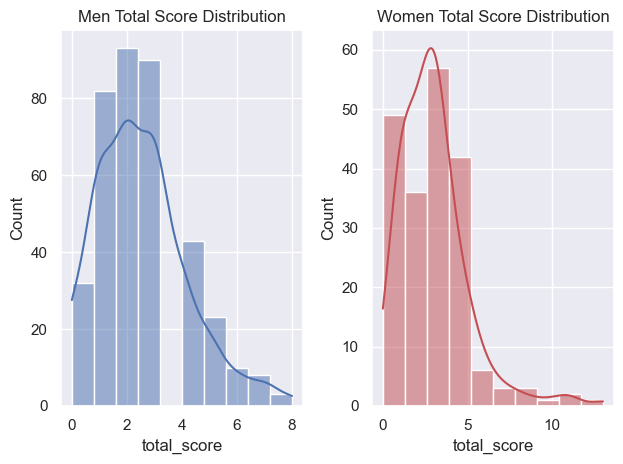

In [77]:
# How the data distributed
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(men_filter['total_score'], bins=10, kde=True, color='b')
plt.title('Men Total Score Distribution')

plt.subplot(1, 2, 2)
sns.histplot(women_filter['total_score'], bins=10, kde=True, color='r')
plt.title('Women Total Score Distribution')

plt.tight_layout()
plt.show()

Since the our data is not normally distributed and, we are comparing two independent samples from two populations, we are going to use a non-parametric test: 
***The Wilcoxon-Mann-Whitney (WMW) test***

We will:

        1 - Combine two datasets
        2 - Convert the data to wide format

In [78]:
# Combine both men and women data
w_m_data = pd.concat([men_filter, women_filter], axis=0, ignore_index=True)

In [80]:
# Transform the data for the WMW test
w_m_sub = w_m_data[['total_score', 'gender']]
w_m_wide = w_m_sub.pivot(columns = 'gender', values = 'total_score')

Since we are checking an alternative hypothesis looking for 'GREATER', we will use a right tailed test.

In [86]:
# Perform a right-tailed Wilcoxon-Mann-Whitney (WMW) test (using pingouin)

results_wmw = pingouin.mwu( x = w_m_wide['women'],
                            y = w_m_wide['men'],
                            alternative = 'greater')

In [103]:
# extract p-value from pingouin result and hypothesis test result using significance level
p_val_wmw = results_wmw['p-val'].values[0]
p_val_wmw

0.005106609825443641

In [106]:
if p_val_wmw <= alpha:
    result = print("Reject the Null Hypothesis")
else:
    result = print("Fail to reject the Null Hypothesis")

reject the Null Hypothesis


In [82]:
# Alternatively with scipy stats

results_swmw = mannwhitneyu( x = women_filter['total_score'],
                             y = men_filter['total_score'],
                             alternative = 'greater')

In [107]:
results_swmw

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)